In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential




In [2]:
# Define the start of "Moby Dick"
moby_dick_text = """
Call me Ishmael. Some years ago—never mind how long precisely—having little or no money in my purse, and nothing particular to interest me on shore, I thought I would sail about a little and see the watery part of the world. It is a way I have of driving off the spleen and regulating the circulation. Whenever I find myself growing grim about the mouth; whenever it is a damp, drizzly November in my soul; whenever I find myself involuntarily pausing before coffin warehouses, and bringing up the rear of every funeral I meet; and especially whenever my hypos get such an upper hand of me, that it requires a strong moral principle to prevent me from deliberately stepping into the street, and methodically knocking people’s hats off—then, I account it high time to get to sea as soon as I can. This is my substitute for pistol and ball. With a philosophical flourish Cato throws himself upon his sword; I quietly take to the ship. There is nothing surprising in this. If they but knew it, almost all men in their degree, some time or other, cherish very nearly the same feelings towards the ocean with me.
"""

# Define the start of "Metamorphosis" text
metamorphosis_text = """
As Gregor Samsa awoke one morning from uneasy dreams he found himself transformed in his bed into a gigantic insect. He was lying on his hard, as it were armor-plated, back and when he lifted his head a little he could see his domelike brown belly divided into stiff arched segments on top of which the bed quilt could hardly keep in position and was about to slide off completely. His numerous legs, which were pitifully thin compared to the rest of his bulk, waved helplessly before his eyes.
"""

In [3]:
# Tokenization and Padding
# Tokenize and pad sequences for "Moby Dick"
tokenizer_moby_dick = Tokenizer()
tokenizer_moby_dick.fit_on_texts([moby_dick_text])
encoded_docs_moby_dick = tokenizer_moby_dick.texts_to_sequences([moby_dick_text])
max_length_moby_dick = 50
padded_docs_moby_dick = pad_sequences(encoded_docs_moby_dick, maxlen=max_length_moby_dick, padding='post')

# Tokenize and pad sequences for "Metamorphosis"
tokenizer_metamorphosis = Tokenizer()
tokenizer_metamorphosis.fit_on_texts([metamorphosis_text])
encoded_docs_metamorphosis = tokenizer_metamorphosis.texts_to_sequences([metamorphosis_text])
max_length_metamorphosis = 50
padded_docs_metamorphosis = pad_sequences(encoded_docs_metamorphosis, maxlen=max_length_metamorphosis, padding='post')


In [4]:
# Combine the two sets of embeddings
padded_docs_combined = np.concatenate((padded_docs_moby_dick, padded_docs_metamorphosis), axis=0)



In [5]:
# Combine the two sets of labels
labels_combined = np.array([0] * padded_docs_moby_dick.shape[0] + [1] * padded_docs_metamorphosis.shape[0])


In [6]:

# Define vocabulary sizes for both texts
vocab_size_moby_dick = len(tokenizer_moby_dick.word_index) + 1
vocab_size_metamorphosis = len(tokenizer_metamorphosis.word_index) + 1




In [7]:
# Define embedding dimensionality
embedding_dim = 8



In [8]:
# Create embedding layers for both texts
embedding_layer_moby_dick = Embedding(input_dim=vocab_size_moby_dick, output_dim=embedding_dim, input_length=max_length_moby_dick)
embedding_layer_metamorphosis = Embedding(input_dim=vocab_size_metamorphosis, output_dim=embedding_dim, input_length=max_length_metamorphosis)



In [9]:
# Define model architectures for both texts
model_moby_dick = Sequential()
model_moby_dick.add(embedding_layer_moby_dick)

model_metamorphosis = Sequential()
model_metamorphosis.add(embedding_layer_metamorphosis)



In [10]:
# Compile the models
model_moby_dick.compile('adam', 'mse')
model_metamorphosis.compile('adam', 'mse')


In [11]:

# Get the embeddings for the padded documents for both texts
embeddings_moby_dick = model_moby_dick.predict(padded_docs_moby_dick)
embeddings_metamorphosis = model_metamorphosis.predict(padded_docs_metamorphosis)



1/1 [==============================] - 0s 445ms/step


In [12]:
# Reshape embeddings for PCA
reshaped_embeddings_moby_dick = embeddings_moby_dick.reshape(embeddings_moby_dick.shape[1], -1)
reshaped_embeddings_metamorphosis = embeddings_metamorphosis.reshape(embeddings_metamorphosis.shape[1], -1)



In [13]:
# Reduce dimensionality for visualization
pca = PCA(n_components=3)
embeddings_3d_moby_dick = pca.fit_transform(reshaped_embeddings_moby_dick)
embeddings_3d_metamorphosis = pca.fit_transform(reshaped_embeddings_metamorphosis)



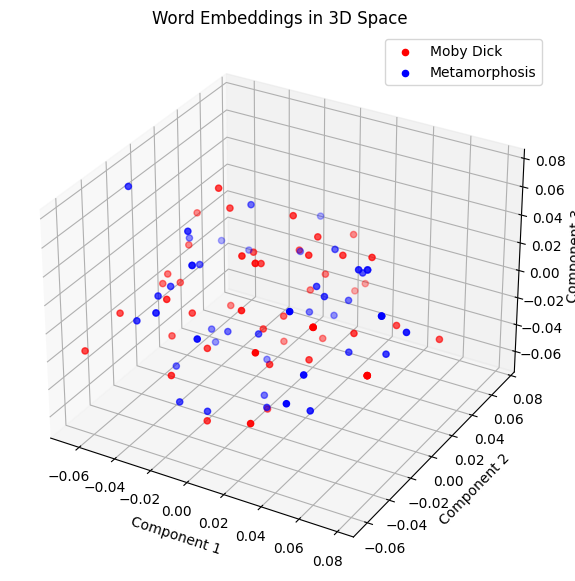

In [14]:
# Visualize embeddings in 3D space
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embeddings_3d_moby_dick[:, 0], embeddings_3d_moby_dick[:, 1], embeddings_3d_moby_dick[:, 2], c='r', marker='o', label='Moby Dick')
ax.scatter(embeddings_3d_metamorphosis[:, 0], embeddings_3d_metamorphosis[:, 1], embeddings_3d_metamorphosis[:, 2], c='b', marker='o', label='Metamorphosis')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('Word Embeddings in 3D Space')
ax.legend()
plt.show()